In [16]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [19]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [20]:
%ls ./plot_gtm_5000

gene_Atf4_biallelic.npy  gene_Atf4_cast.npy      gene_Fos_c57.npy
gene_Atf4_c57.npy        gene_Fos_biallelic.npy  gene_Fos_cast.npy


In [21]:
%pwd

'/home/anna/Documents/research_projects/transcriptional_bursting'

In [22]:
df = npy2df('./plot_gtm_5000/gene_Atf4_cast.npy')
df

,kon,ron,koff,roff,mu,delta,dist
0,4.673713,8.896998,2.586145,4.023881,69.673364,1.0,0.149108
1,1.688881,4.836590,2.561052,12.367195,96.067509,1.0,0.390571
2,5.453951,9.191855,2.102613,1.907799,54.645072,1.0,0.193350
3,4.913841,6.875454,8.704661,13.707945,76.611671,1.0,0.222291
4,7.150963,12.065535,4.053554,6.330485,65.152823,1.0,0.188776
...,...,...,...,...,...,...,...
4995,0.938338,4.664550,2.189875,6.253556,51.377910,1.0,0.528016
4996,5.804415,8.245067,4.989390,6.223148,70.752357,1.0,0.196877
4997,7.685668,10.847314,8.387051,13.186345,82.031286,1.0,0.139426
4998,6.533015,8.193186,8.906237,10.346607,70.687768,1.0,0.211359


In [23]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [24]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,4.673713,8.896998,2.586145,4.023881,69.673364,1.0,0.149108,0.525313,0.642699,0.856155,44.779014
1,1.688881,4.836590,2.561052,12.367195,96.067509,1.0,0.390571,0.349188,0.207084,1.797679,19.894077
2,5.453951,9.191855,2.102613,1.907799,54.645072,1.0,0.193350,0.593346,1.102114,0.589810,60.225118
3,4.913841,6.875454,8.704661,13.707945,76.611671,1.0,0.222291,0.714693,0.635008,0.740904,48.649059
4,7.150963,12.065535,4.053554,6.330485,65.152823,1.0,0.188776,0.592677,0.640323,0.811030,41.718840
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.938338,4.664550,2.189875,6.253556,51.377910,1.0,0.528016,0.201164,0.350181,1.813748,17.991557
4996,5.804415,8.245067,4.989390,6.223148,70.752357,1.0,0.196877,0.703986,0.801747,0.664128,56.725491
4997,7.685668,10.847314,8.387051,13.186345,82.031286,1.0,0.139426,0.708532,0.636041,0.743731,52.175227
4998,6.533015,8.193186,8.906237,10.346607,70.687768,1.0,0.211359,0.797372,0.860788,0.603078,60.847199


In [25]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [26]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [27]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde="density_kernel"):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [28]:
best_parameters(df)

1768

In [29]:
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs,log_kon,log_koff,log_bs,log_bf,density_kernel
0,4.673713,8.896998,2.586145,4.023881,69.673364,1.0,0.149108,0.525313,0.642699,0.856155,44.779014,0.669662,0.412653,1.651075,-0.067448,0.043116
1,1.688881,4.836590,2.561052,12.367195,96.067509,1.0,0.390571,0.349188,0.207084,1.797679,19.894077,0.227599,0.408418,1.298724,0.254712,0.012625
2,5.453951,9.191855,2.102613,1.907799,54.645072,1.0,0.193350,0.593346,1.102114,0.589810,60.225118,0.736711,0.322759,1.779778,-0.229288,0.019689
3,4.913841,6.875454,8.704661,13.707945,76.611671,1.0,0.222291,0.714693,0.635008,0.740904,48.649059,0.691421,0.939752,1.687074,-0.130238,0.037073
4,7.150963,12.065535,4.053554,6.330485,65.152823,1.0,0.188776,0.592677,0.640323,0.811030,41.718840,0.854365,0.607836,1.620332,-0.090963,0.041065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.938338,4.664550,2.189875,6.253556,51.377910,1.0,0.528016,0.201164,0.350181,1.813748,17.991557,-0.027640,0.340419,1.255069,0.258577,0.009945
4996,5.804415,8.245067,4.989390,6.223148,70.752357,1.0,0.196877,0.703986,0.801747,0.664128,56.725491,0.763758,0.698047,1.753778,-0.177748,0.025241
4997,7.685668,10.847314,8.387051,13.186345,82.031286,1.0,0.139426,0.708532,0.636041,0.743731,52.175227,0.885682,0.923609,1.717464,-0.128584,0.032907
4998,6.533015,8.193186,8.906237,10.346607,70.687768,1.0,0.211359,0.797372,0.860788,0.603078,60.847199,0.815114,0.949694,1.784241,-0.219626,0.019025


In [30]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

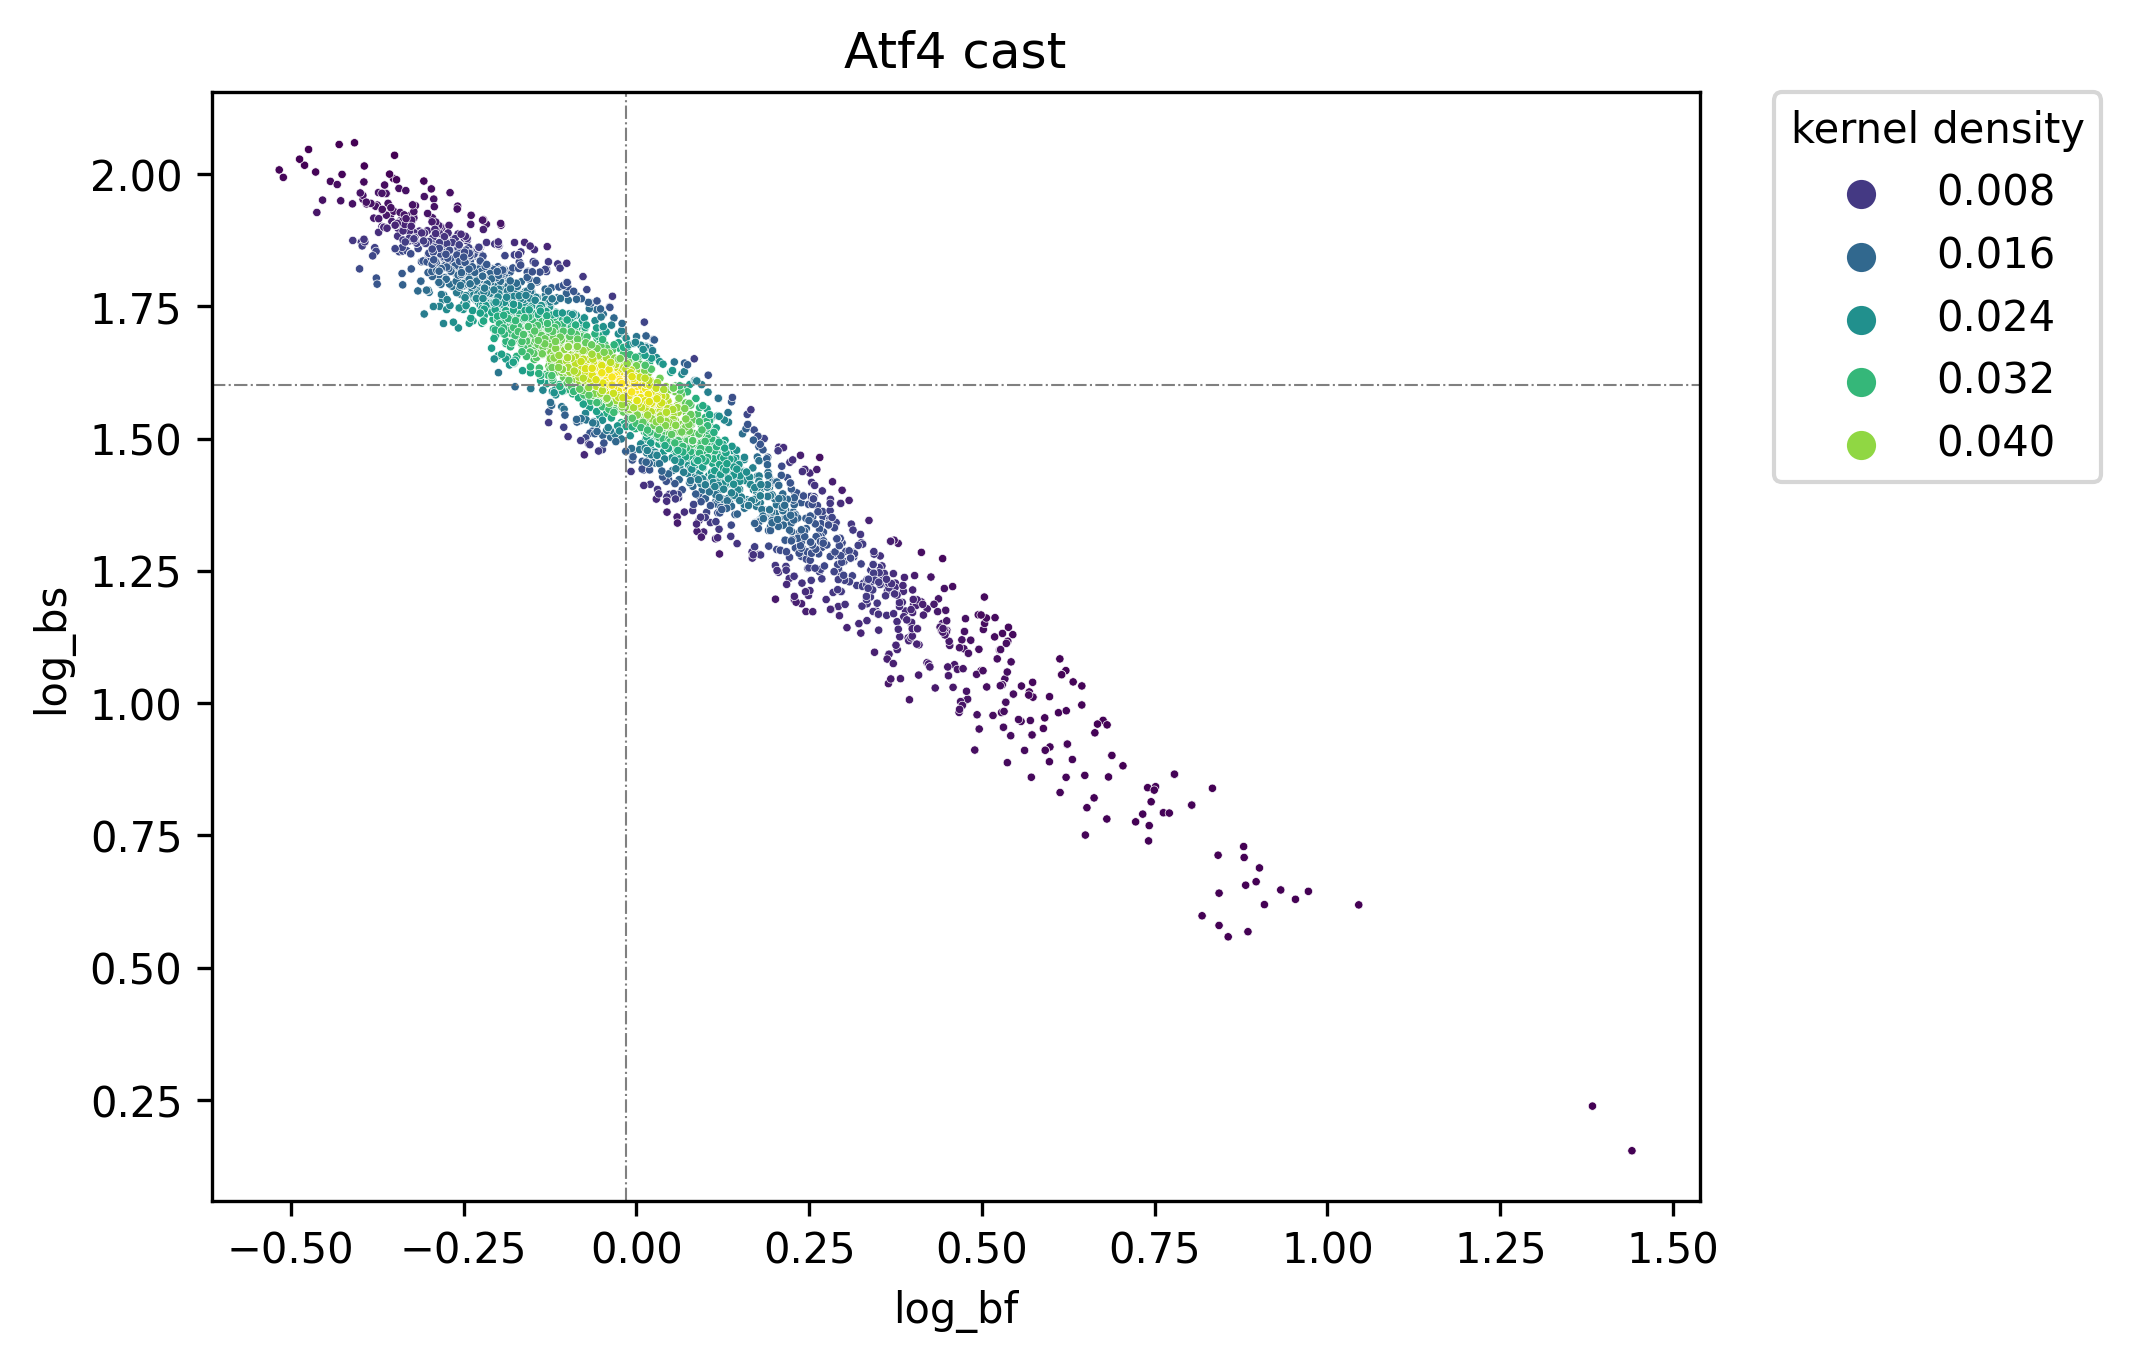

In [31]:
plot_kde(df, bs="log_bs", bf="log_bf", title="Atf4 cast", dot_size=4, save="Atf4_cast_kde.png")